## Exploratory Data Analysis

In [ ]:
from pathlib import Path
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Quality Checks
The code cell below is making sure all images are in the same format.

In [5]:
# Notebook is in notebooks/
# Data is in ../data/interim/
# Make sure to adjust the path accordingly
DATA_DIR = Path("../data/interim")

# Making sure all images same format
extensions = []

for path in DATA_DIR.rglob("*"):
    if path.is_file():
        extensions.append(path.suffix.lower())

extension_counts = Counter(extensions)
extension_counts

Counter({'.jpg': 25553, '.yaml': 1, '': 1})

The code cell below is fetching number of images per split per class.

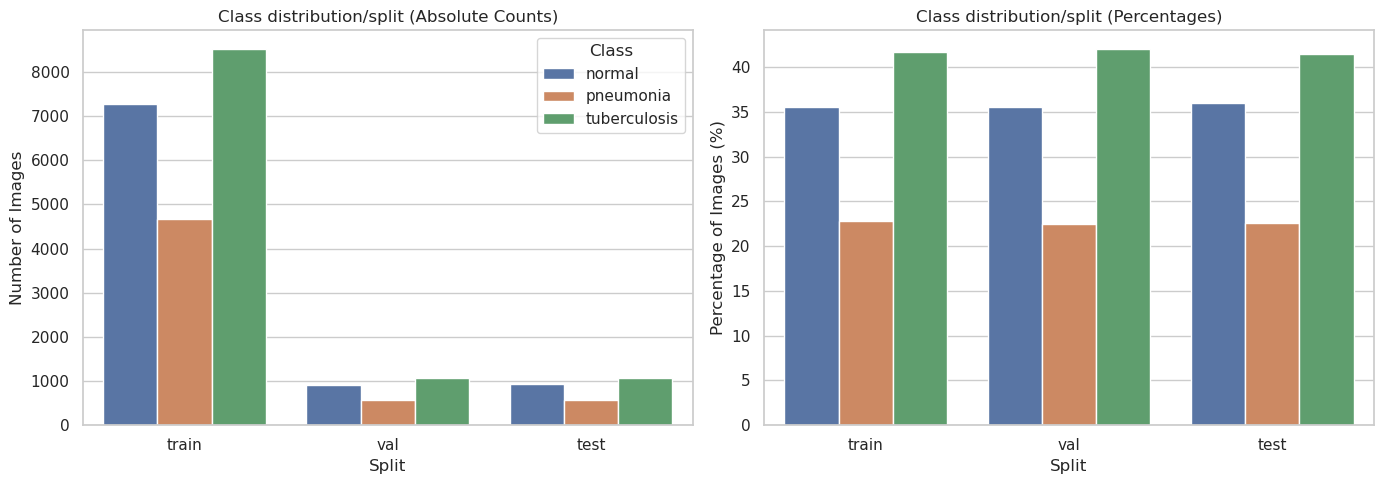

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute percentages within each split
counts_pct_df = counts_df.copy()
counts_pct_df["percent"] = (
    counts_pct_df
    .groupby("split")["num_images"]
    .transform(lambda x: x / x.sum() * 100)
)

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# --- Plot 1: Absolute counts ---
sns.barplot(
    data=counts_df,
    x="split",
    y="num_images",
    hue="class",
    ax=axes[0]
)
axes[0].set_title("Class distribution/split (Absolute Counts)")
axes[0].set_xlabel("Split")
axes[0].set_ylabel("Number of Images")

# --- Plot 2: Percentages ---
sns.barplot(
    data=counts_pct_df,
    x="split",
    y="percent",
    hue="class",
    ax=axes[1]
)
axes[1].set_title("Class distribution/split (Percentages)")
axes[1].set_xlabel("Split")
axes[1].set_ylabel("Percentage of Images (%)")

# Handle legends (avoid duplication)
axes[0].legend(title="Class")
axes[1].legend_.remove()

plt.tight_layout()
plt.show()


Given the table/figures above, I will keep the current split. 
The reasons for this are:  
a- the split contains all classes,  
b- close proportions of classes within each split,  
c- keep comparability with existing work,  
d- lack of patient metadata to actually make informative re-splitting.